<a href="https://colab.research.google.com/github/savastakan/codes/blob/main/Hitit_resnet50_32label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pathlib
data_directory = pathlib.Path("/content/drive/MyDrive/Projeler/hitit_projesi/subdataset")

In [11]:
img_height,img_width=280, 280
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="training",
  seed=42,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="validation",
  seed=42,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3117 files belonging to 32 classes.
Using 2494 files for training.
Found 3117 files belonging to 32 classes.
Using 623 files for validation.


In [14]:
model = Sequential()
n_classes = 32
pretrained_model= tf.keras.applications.ResNet50(include_top=False, input_shape=(280,280,3), pooling='avg',classes= n_classes, weights='imagenet')

for each_layer in pretrained_model.layers:
        each_layer.trainable=False

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(n_classes, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [15]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
78/78 [==============================] - 50s 474ms/step - loss: 2.7258 - accuracy: 0.2831 - val_loss: 2.1571 - val_accuracy: 0.3884
Epoch 2/10
78/78 [==============================] - 27s 321ms/step - loss: 1.7116 - accuracy: 0.5180 - val_loss: 1.7387 - val_accuracy: 0.5249
Epoch 3/10
78/78 [==============================] - 27s 322ms/step - loss: 1.2540 - accuracy: 0.6431 - val_loss: 1.6806 - val_accuracy: 0.5136
Epoch 4/10
78/78 [==============================] - 28s 334ms/step - loss: 0.9388 - accuracy: 0.7285 - val_loss: 1.5260 - val_accuracy: 0.5650
Epoch 5/10
78/78 [==============================] - 30s 368ms/step - loss: 0.7150 - accuracy: 0.8087 - val_loss: 1.5037 - val_accuracy: 0.5618
Epoch 6/10
78/78 [==============================] - 27s 327ms/step - loss: 0.5726 - accuracy: 0.8480 - val_loss: 1.5019 - val_accuracy: 0.5843
Epoch 7/10
78/78 [==============================] - 26s 321ms/step - loss: 0.4335 - accuracy: 0.8913 - val_loss: 1.3874 - val_accuracy: 0.6356

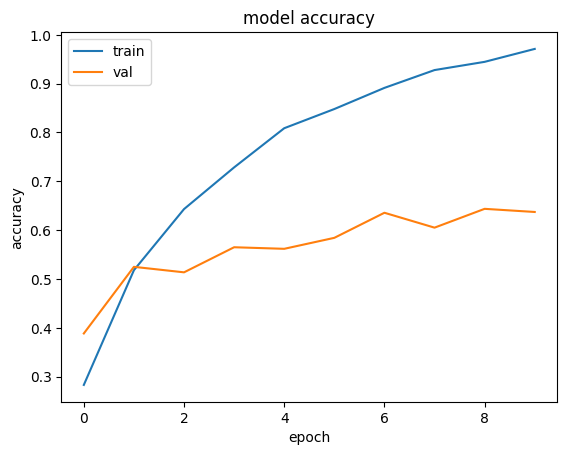

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()